In [52]:
import signal

# imports
import numpy as np
from scipy.signal import butter, lfilter, correlate, correlation_lags
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, lstsq, solve, solve_toeplitz

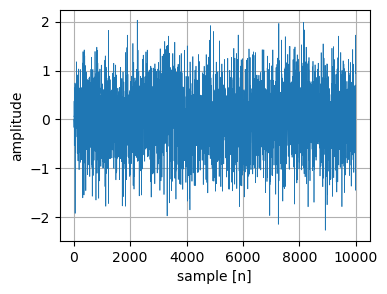

In [85]:
# signal generation
# random Gaussian noise
n = np.random.randn(10000)
# low-pass filter
b, a = butter(5, np.pi/10, btype='low', analog=False)
# filtered noise
x = lfilter(b, a, n)
plt.figure(figsize=(4,3))
plt.plot(x,linewidth=0.5)
plt.xlabel('sample [n]')
plt.ylabel('amplitude')
plt.grid()
plt.savefig('signal.jpeg',dpi=400, bbox_inches='tight')
plt.show()

In [86]:
Rxx = correlate(x, x, mode='full')
lags = correlation_lags(len(x), len(x))
Rxx[lags >= 0][:6]  # autocorrelations

array([3193.85456958, 2660.06448928, 1401.26613766,  164.38467177,
       -470.20060673, -440.93174775])

28.88137148179476 18.74972202657362


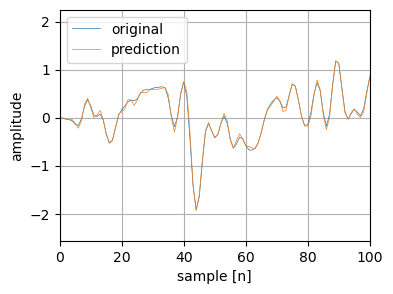

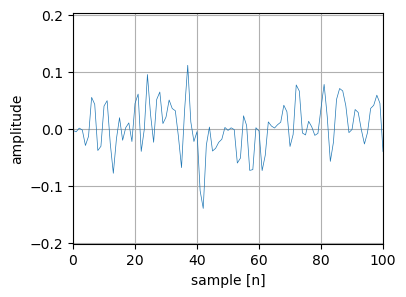

In [89]:
def lpc(x, p):
    # first column of the Toeplitz matrix
    # autocorrelations
    Rxx = correlate(x, x, mode='full')
    # lags = np.arange(-len(x)+1, len(x))
    lags = correlation_lags(len(x), len(x))
    R = toeplitz(Rxx[lags >= 0][:p])
    r = Rxx[lags >= 0][1:p+1]
    # a = solve(R, r)
    a = solve_toeplitz(Rxx[lags >= 0][:p], r)
    e_theory = Rxx[lags == 0][0] - np.dot(r, a)
    return a, e_theory


a, e_theory = lpc(x, 15)
b = np.concatenate([[0], a])
y_hat = lfilter(b, 1, x)
e = x - y_hat
# y_hat = lfilter(a, 1, x)
# e = x[1:] - y_hat[:-1]

print(e_theory, e.T @ e)

plt.figure(figsize=(4,3))
plt.plot(x, label='original', linewidth=0.5)
plt.plot(y_hat, label='prediction', linewidth=0.5)
plt.xlabel('sample [n]')
plt.ylabel('amplitude')
plt.legend()
plt.xlim(0, 100)
plt.grid()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(e, label='error', linewidth=0.5)
plt.xlabel('sample [n]')
plt.ylabel('amplitude')
plt.xlim(0, 100)
plt.grid()
plt.show()

In [35]:
import librosa
librosa.lpc(x,order=4)
# note that librosa returns the coefficients calculated in by the different method

array([ 1.        , -2.80881112,  3.602855  , -2.43972755,  0.73734394])